In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,precision_recall_curve,roc_curve,confusion_matrix,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import auc
%matplotlib inline

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Clinic-no-show-data (1)1583812446.687889.csv to Clinic-no-show-data (1)1583812446.687889.csv
User uploaded file "Clinic-no-show-data (1)1583812446.687889.csv" with length 12171822 bytes


##1. Load the data from the csv file using pandas

In [0]:
df=pd.read_csv("Clinic-no-show-data (1)1583812446.687889.csv")#This command is used to read the csv file using the pandas library in python

##2. Preview/print the top 10 rows of the data 

In [0]:
df.head(10)#This command is used for printing the top 10 rows of the dataset

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Status
0,19,M,Wednesday,0,0,0,0,0,0,0,0,29,Show-Up
1,24,F,Wednesday,0,0,0,0,0,0,0,0,1,Show-Up
2,4,F,Tuesday,0,0,0,0,0,0,0,0,1,Show-Up
3,5,M,Thursday,0,0,0,0,0,0,0,1,15,Show-Up
4,38,M,Tuesday,0,0,0,0,0,0,0,1,6,Show-Up
5,5,F,Tuesday,0,0,0,0,0,0,0,1,35,No-Show
6,46,F,Tuesday,0,0,0,0,0,0,0,1,18,Show-Up
7,4,F,Friday,0,0,0,0,0,1,0,1,14,Show-Up
8,20,F,Tuesday,0,0,0,0,0,0,0,0,14,Show-Up
9,51,F,Tuesday,1,0,1,0,0,0,0,1,4,Show-Up


In [0]:
df.isna().sum()  # This command is used for checking whether the dataframe haas any NAN values or not  

Age             0
Gender          0
DayOfTheWeek    0
Diabetes        0
Alcoolism       0
HiperTension    0
Handcap         0
Smokes          0
Scholarship     0
Tuberculosis    0
Sms_Reminder    0
AwaitingTime    0
Status          0
dtype: int64

##4. Removing the status column from data 

In [0]:
X=df.drop(['Status'],axis=1) # This command is used to drop the Status column 

In [0]:
X.head(10)

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,Wednesday,0,0,0,0,0,0,0,0,29
1,24,F,Wednesday,0,0,0,0,0,0,0,0,1
2,4,F,Tuesday,0,0,0,0,0,0,0,0,1
3,5,M,Thursday,0,0,0,0,0,0,0,1,15
4,38,M,Tuesday,0,0,0,0,0,0,0,1,6
5,5,F,Tuesday,0,0,0,0,0,0,0,1,35
6,46,F,Tuesday,0,0,0,0,0,0,0,1,18
7,4,F,Friday,0,0,0,0,0,1,0,1,14
8,20,F,Tuesday,0,0,0,0,0,0,0,0,14
9,51,F,Tuesday,1,0,1,0,0,0,0,1,4


##6. Converting the Gender feature and Day of week feature and assigning the dummy values to them  

In [0]:
X['Gender']=pd.get_dummies(X['Gender'])

days = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}#This command is used for making dictionary

X['DayOfTheWeek']=X['DayOfTheWeek'].apply(lambda x:days[x])#Here we are giving the integer values to all the days of the week


In [0]:
X.head()


,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,0,2,0,0,0,0,0,0,0,0,29
1,24,1,2,0,0,0,0,0,0,0,0,1
2,4,1,1,0,0,0,0,0,0,0,0,1
3,5,0,3,0,0,0,0,0,0,0,1,15
4,38,0,1,0,0,0,0,0,0,0,1,6


##3. Print the label distribution using the collection.Counter function. This should print the number ofinstances that have a “Show-up” label and the number of instances that have a “No-Show” label.

In [0]:
Y=df['Status']
Y.value_counts()

Show-Up    209269
No-Show     90731
Name: Status, dtype: int64

In [0]:

Y.head()
quaity={'Show-Up':1 ,'No-Show':0 }
Y=Y.apply(lambda x:quaity[x])

## 5. Created a label vector named Y and printed first 5 rows of that column

In [0]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [0]:
Y1=Y

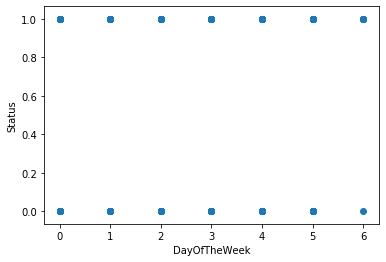

In [0]:
plt.scatter(X['DayOfTheWeek'],Y)
plt.xlabel("DayOfTheWeek")
plt.ylabel("Status")
plt.show()

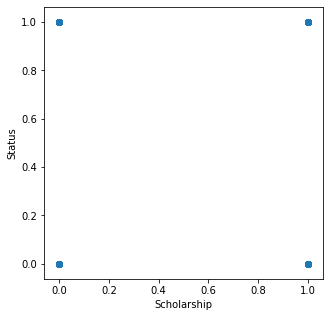

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X["Scholarship"], Y)
ax.set_xlabel("Scholarship")
ax.set_ylabel("Status")
plt.show()

In [0]:
quantity=['Gender','Age','DayOfTheWeek','HiperTension','Alcoolism','Handcap','Smokes']

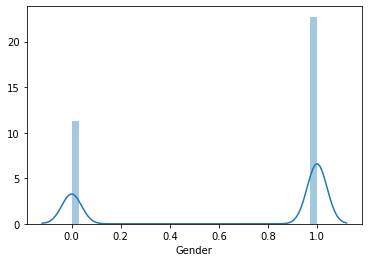

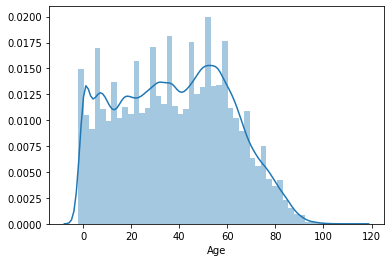

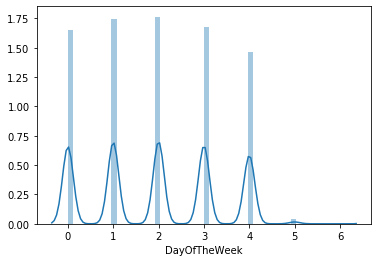

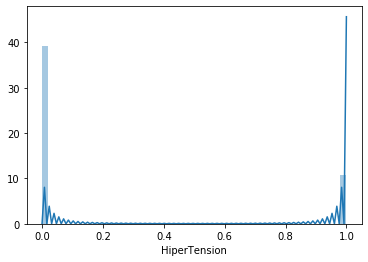

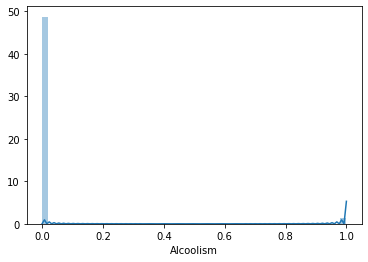

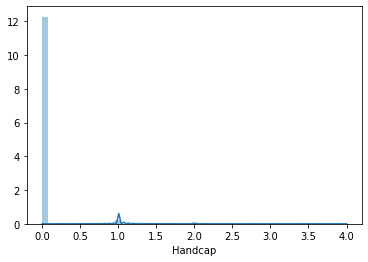

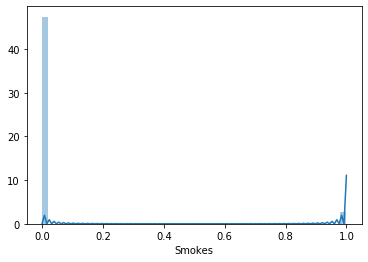

In [0]:
for a in quantity:
  sns.distplot(X[a])
  plt.show()

## 7. Splitting the dataset into 80% training and 20% test 

In [0]:

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)#This command is dividing the whole dataset into 80% of train dataset and 20% of test dataset

In [0]:
clf=PCA()#This command is used for making the applying and transform the data By using Principal Component Analysis

In [0]:
X_train=clf.fit_transform(X_train)

In [0]:
X_test=clf.fit_transform(X_test)

##8. Training the logistic regression model

In [0]:
model=LogisticRegression(C=0.1)
#This command is making a model of Logistic regression

In [0]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##9. Testing and predicting the values using trained model

In [0]:
Y_predict=model.predict(X_test)

##11. All types of scores

In [0]:
acc=accuracy_score(Y_test,Y_predict)


In [0]:
macrof1score=f1_score(Y_test,Y_predict,average='macro')

In [0]:
microf1score=f1_score(Y_test,Y_predict,average='micro')

In [0]:
weightedf1score=f1_score(Y_test,Y_predict,average='weighted')

In [0]:
precision=precision_score(Y_test,Y_predict,average='weighted')

In [0]:
recallscore=recall_score(Y_test,Y_predict,average='weighted')

In [0]:
print("Accuracy is :",acc)
print("------------------")
print("Macro f1 score is: ",macrof1score)
print("------------------")
print("Micro f1 score is : ",microf1score)
print("------------------")
print("Weighted f1 score is :",weightedf1score)
print("------------------")
print("Precision is :",precision)
print("------------------")
print("Recall score is :",recallscore)

Accuracy is : 0.6972
------------------
Macro f1 score is:  0.41365423461312917
------------------
Micro f1 score is :  0.6972
------------------
Weighted f1 score is : 0.5748493634353078
------------------
Precision is : 0.6069330325207727
------------------
Recall score is : 0.6972


##10. Confusion matrix

In [0]:
c_m=confusion_matrix(Y_test,Y_predict)

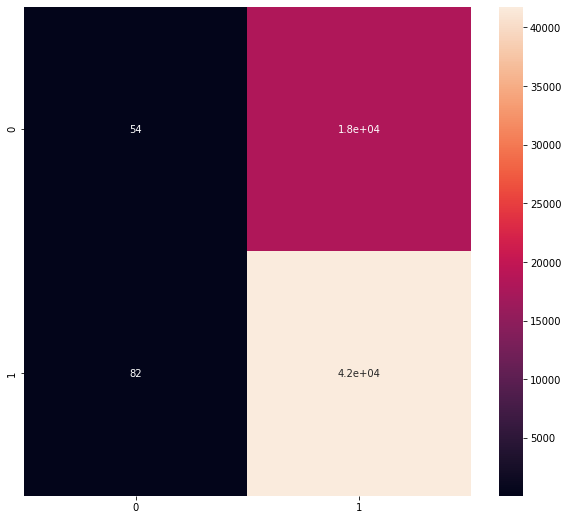

In [0]:
plt.figure(figsize = (10,9))
sns.heatmap(c_m,annot=True)

##12. PR and ROC curves for the dataset containing all features 

In [0]:
ls=model.predict_proba(X_test)
ls=ls[:, 1]

In [0]:
roc_auc=roc_auc_score(Y_test,ls)
print(roc_auc)

0.5850315451410197


In [0]:
ns_probs = [0 for _ in range(len(Y_test))]

In [0]:
ns_auc = roc_auc_score(Y_test, ns_probs)

In [0]:
#This is the ROC curve

In [0]:
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, ls)

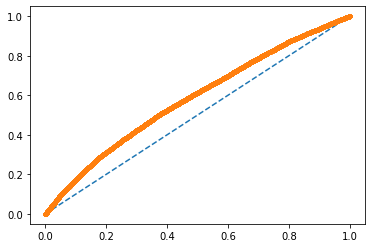

In [0]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

In [0]:
#this is the PR curve

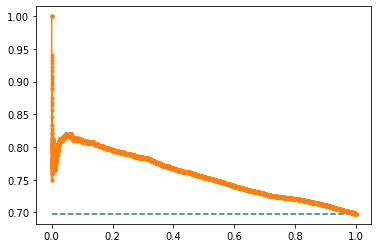

In [0]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, ls1)
lr_f1, lr_auc = f1_score(Y_test, Y_predict), auc(lr_recall, lr_precision)
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

##13.Removed the sms_reminder feature column from the dataset

In [0]:
X1=df.drop(['Sms_Reminder','Status'],axis=1)

In [0]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [0]:
X1_train=clf.fit_transform(X1_train)
X1_test=clf.fit_transform(X1_test)

In [0]:
model.fit(X1_train,Y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y1_predict=model.predict(X1_test)

In [0]:

weightedf1score=f1_score(Y1_test,Y1_predict,average='weighted')
recallscore=recall_score(Y1_test,Y1_predict,average='weighted')
precisionscore=precision_score(Y1_test,Y1_predict,average='weighted')
print("Weighted f1 score is :",weightedf1score)
print("------------------")
print("Precision is :",precision)
print("------------------")
print("Recall score is :",recallscore)

Weighted f1 score is : 0.57464427228911
------------------
Precision is : 0.6069330325207727
------------------
Recall score is : 0.6972166666666667


##13.Plotted poc and ROC curves all features except sms_reminder

In [0]:
ls1=model.predict_proba(X1_test)
ls1=ls1[:, 1]

In [0]:
roc_auc=roc_auc_score(Y1_test,ls1)
print (roc_auc)

0.5836250876418534


In [0]:
#This is the ROC curve

In [0]:
ns_probs = [0 for _ in range(len(Y1_test))]
ns_fpr, ns_tpr, _ = roc_curve(Y1_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y1_test, ls1)

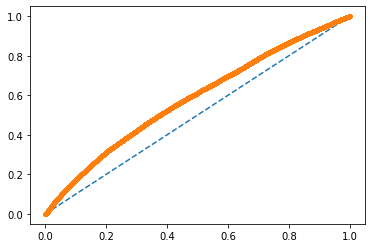

In [0]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

In [0]:
#This is the PR Curve

In [0]:
lr_precision, lr_recall, _ = precision_recall_curve(Y1_test, ls1)
lr_f1, lr_auc = f1_score(Y1_test, Y1_predict), auc(lr_recall, lr_precision)

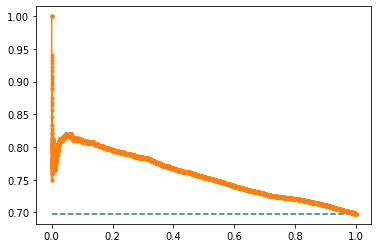

In [0]:
no_skill = len(Y1_test[Y1_test==1]) / len(Y1_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

In [0]:
from sklearn.model_selection import KFold

##14. Retraining the model on all features using 10-fold cross validation 

In [0]:
model1=KFold(n_splits=10)

In [0]:
model1.get_n_splits(X)

10

In [0]:
for train_index, test_index in model1.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  

TRAIN: [ 30000  30001  30002 ... 299997 299998 299999] TEST: [    0     1     2 ... 29997 29998 29999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [30000 30001 30002 ... 59997 59998 59999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [60000 60001 60002 ... 89997 89998 89999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [ 90000  90001  90002 ... 119997 119998 119999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [120000 120001 120002 ... 149997 149998 149999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [150000 150001 150002 ... 179997 179998 179999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [180000 180001 180002 ... 209997 209998 209999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [210000 210001 210002 ... 239997 239998 239999]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [240000 240001 240002 ... 269997 269998 269999]
TRAIN: [     0      1      2 ... 2699

##15. Print the average accuracy, average precision, average recall, and average F1_score

In [0]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
scoring = {'prec_macro': 'precision_macro','rec_macro': make_scorer(recall_score, average='macro'),'f1_macro':make_scorer(f1_score,average='macro')}

kfold = KFold(n_splits=10)
model=LogisticRegression(C=0.1)

results = cross_validate(estimator=model,X=X,y=Y,cv=kfold,scoring=scoring,return_train_score=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
print(results)

{'fit_time': array([4.85178685, 4.60486627, 4.06387019, 4.42894363, 5.0646615 ,
       4.71916962, 4.41818881, 4.82827234, 4.5845902 , 4.57019401]), 'score_time': array([0.05540395, 0.05308127, 0.05208421, 0.05237365, 0.05193567,
       0.0521071 , 0.05150199, 0.05223775, 0.05231094, 0.051759  ]), 'test_prec_macro': array([0.53233032, 0.61911371, 0.54880291, 0.57646202, 0.59509713,
       0.59278945, 0.54099282, 0.5506016 , 0.55703757, 0.57435747]), 'train_prec_macro': array([0.57320218, 0.56223321, 0.56890556, 0.57068923, 0.56671251,
       0.5669324 , 0.57149192, 0.56902349, 0.5689191 , 0.56652769]), 'test_rec_macro': array([0.50045857, 0.50187528, 0.50062746, 0.50110469, 0.50132698,
       0.50111287, 0.50070185, 0.50064199, 0.50083059, 0.50127851]), 'train_rec_macro': array([0.50111695, 0.50090405, 0.5009582 , 0.50100253, 0.50096375,
       0.50099667, 0.50107746, 0.50100317, 0.50097775, 0.50095227]), 'test_f1_macro': array([0.41421312, 0.41666286, 0.41326508, 0.4146713 , 0.4166862

In [0]:
type(results)

dict

In [0]:
loso=np.array(list(results.values()))

In [0]:
print(loso)

[[5.21189404 5.05722499 4.60496306 4.95329833 5.62605834 5.2429378
  4.91931653 5.32786131 5.10617113 5.07818723]
 [0.03734159 0.03696799 0.03664422 0.0375154  0.03679657 0.03718209
  0.03668714 0.03695178 0.03857684 0.03687811]
 [0.53233032 0.61911371 0.54880291 0.57646202 0.59509713 0.59278945
  0.54099282 0.5506016  0.55703757 0.57435747]
 [0.57320218 0.56223321 0.56890556 0.57068923 0.56671251 0.5669324
  0.57149192 0.56902349 0.5689191  0.56652769]
 [0.50045857 0.50187528 0.50062746 0.50110469 0.50132698 0.50111287
  0.50070185 0.50064199 0.50083059 0.50127851]
 [0.50111695 0.50090405 0.5009582  0.50100253 0.50096375 0.50099667
  0.50107746 0.50100317 0.50097775 0.50095227]]


In [0]:
lis =[]
for i in loso:
  sum=0.0
  n=0
  for j in i:
    sum=sum+j
    n+=1
  sum/=n
  lis.append(sum)
print(lis)
  

[5.112791275978088, 0.03715417385101318, 0.5687585021411281, 0.5684637297599326, 0.5009958788070896, 0.5009952784667723]
